In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot space as inline for inline plots display
%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

pd.options.display.float_format = '{:,.0f}'.format

### Studio Investment

In [2]:
df = pd.read_csv('data/studio_gross.csv', float_precision=1)

In [3]:
df.head()

,studio,domestic_gross,foreign_gross,total_gross
0,BV,"415,000,000","652,000,000","1,067,000,000"
1,BV,"334,200,000","691,300,000","1,025,500,000"
2,WB,"296,000,000","664,300,000","960,300,000"
3,WB,"292,600,000","535,700,000","828,300,000"
4,P/DW,"238,700,000","513,900,000","752,600,000"


In [4]:
top10 = df.studio.value_counts().head(10)

In [5]:
top10

IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

In [6]:
type(top10)

pandas.core.series.Series

### Sum the totals for each studio

In [7]:
df.groupby(['studio']).sum()

,domestic_gross,foreign_gross,total_gross
studio,,,
3D,"6,100,000","9,900,000","16,000,000"
A23,"164,200",0,"164,200"
A24,"324,194,200","238,462,200","562,656,400"
ADC,"248,200",0,"248,200"
AF,"2,142,900","3,500,000","5,642,900"
...,...,...,...
XL,"458,000",0,"458,000"
YFG,"1,100,000",0,"1,100,000"
Yash,"31,631,400","272,825,100","304,392,100"


### Sort and aggregate the data for the top 10 studios

In [16]:
df_agg.index

Index(['BV', 'Fox', 'WB', 'Uni.', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'LG/S',
       'P/DW'],
      dtype='object', name='studio')

In [8]:
df_agg = df.groupby(['studio']).agg('sum')

In [9]:
df_agg = df_agg.sort_values('total_gross', ascending=False).head(10)

In [10]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

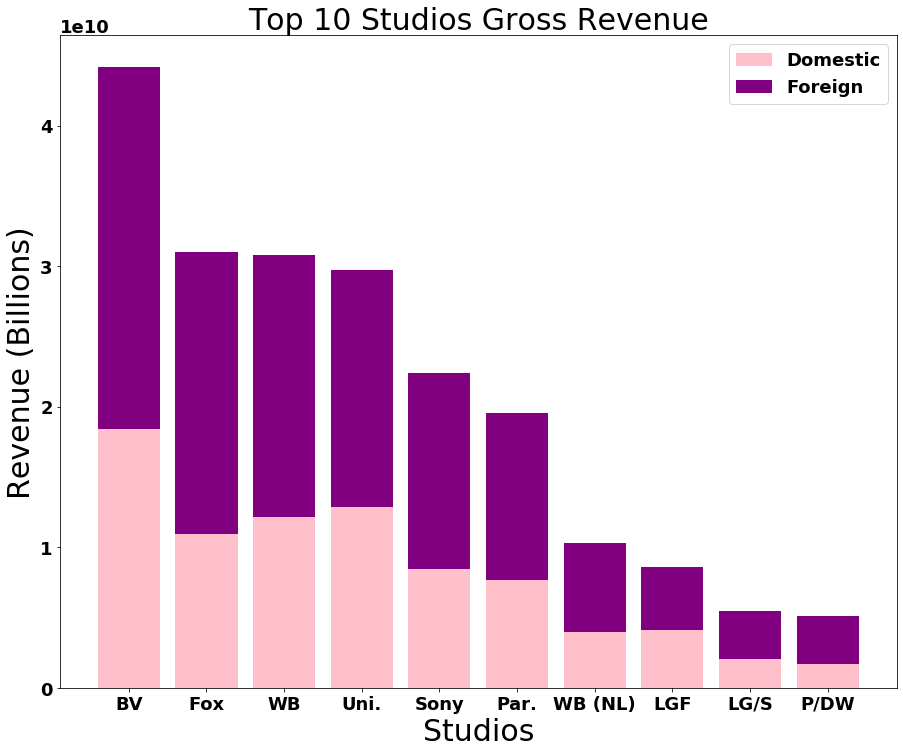

In [20]:
plt.figure(figsize=(15,12))

studios = df_agg.index
dom_gross = df_agg.domestic_gross
for_gross = df_agg.foreign_gross
tot_gross = df_agg.total_gross

plt.bar(range(len(studios)), dom_gross, color='pink')
plt.bar(range(len(studios)), for_gross, color='purple', bottom=dom_gross)
plt.title('Top 10 Studios Gross Revenue', fontsize=30)
plt.xlabel('Studios', fontsize=30)
plt.ylabel('Revenue (Billions)', fontsize=30)
plt.xticks(range(len(studios)), studios)

plt.legend(['Domestic', 'Foreign'])
plt.show();